# Digit Recognition Kaggle Competition
https://www.kaggle.com/c/digit-recognizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

## Data Preprocessing

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(42000, 785)

In [5]:
df_train["label"].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [6]:
# check for null values

df_train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

Apparently data is already processed.
We can check images by ploting them.

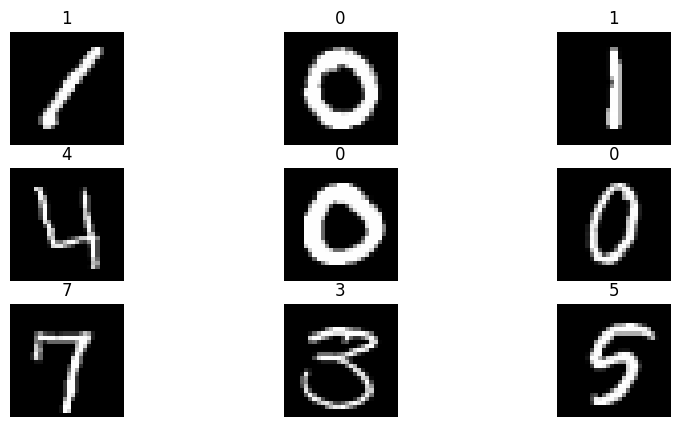

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(10, 5))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(df_train.iloc[i * 3 + j, 1:].values.reshape(28, 28), cmap='gray')
        ax[i, j].set_title(df_train.iloc[i * 3 + j, 0])
        ax[i, j].axis('off')

The only thing that needs to be done is to normalize the data and reshape it.

In [8]:
def normalize(data):
    return data / 255.0


In [9]:
df_train_norm = normalize(df_train.iloc[:, 1:])

In [10]:
df_train_norm.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_train_norm["label"] = df_train["label"]

In [12]:
df_train_norm.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Reshape data in order to use it in CNN model.

In [13]:
train_labels = np.array(df_train_norm["label"])
train_data = np.array(df_train_norm.iloc[:, :-1]).reshape(-1, 28, 28)

In [14]:
train_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Model Selection

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=0)

In [17]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (2, 2), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (2, 2), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
model1.fit(X_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 37s 31ms/step - loss: 0.5107 - accuracy: 0.8341
Epoch 2/10
1050/1050 [==============================] - 36s 34ms/step - loss: 0.1735 - accuracy: 0.9488
Epoch 3/10
1050/1050 [==============================] - 35s 34ms/step - loss: 0.1344 - accuracy: 0.9605
Epoch 4/10
1050/1050 [==============================] - 35s 34ms/step - loss: 0.1133 - accuracy: 0.9678
Epoch 5/10
1050/1050 [==============================] - 35s 34ms/step - loss: 0.0973 - accuracy: 0.9726
Epoch 6/10
1050/1050 [==============================] - 35s 34ms/step - loss: 0.0941 - accuracy: 0.9721
Epoch 7/10
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0823 - accuracy: 0.9767
Epoch 8/10
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0782 - accuracy: 0.9766
Epoch 9/10
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0719 - accuracy: 0.9784
Epoch 10/10
1050/1050 [==============================] - 35s 33m

In [19]:
model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 37s 33ms/step - loss: 0.4952 - accuracy: 0.8393
Epoch 2/10
1050/1050 [==============================] - 34s 32ms/step - loss: 0.1657 - accuracy: 0.9513
Epoch 3/10
1050/1050 [==============================] - 34s 32ms/step - loss: 0.1244 - accuracy: 0.9629
Epoch 4/10
1050/1050 [==============================] - 34s 33ms/step - loss: 0.1088 - accuracy: 0.9683
Epoch 5/10
1050/1050 [==============================] - 33s 32ms/step - loss: 0.0964 - accuracy: 0.9721
Epoch 6/10
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0872 - accuracy: 0.9739
Epoch 7/10
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0808 - accuracy: 0.9770
Epoch 8/10
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0755 - accuracy: 0.9780
Epoch 9/10
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0704 - accuracy: 0.9792
Epoch 10/10
1050/1050 [==============================] - 34s 33m

In [20]:
model3.fit(X_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 35s 31ms/step - loss: 0.4930 - accuracy: 0.8355
Epoch 2/10
1050/1050 [==============================] - 32s 31ms/step - loss: 0.1633 - accuracy: 0.9498
Epoch 3/10
1050/1050 [==============================] - 33s 31ms/step - loss: 0.1246 - accuracy: 0.9611
Epoch 4/10
1050/1050 [==============================] - 32s 31ms/step - loss: 0.1075 - accuracy: 0.9666
Epoch 5/10
1050/1050 [==============================] - 33s 31ms/step - loss: 0.0944 - accuracy: 0.9712
Epoch 6/10
1050/1050 [==============================] - 32s 31ms/step - loss: 0.0902 - accuracy: 0.9728
Epoch 7/10
1050/1050 [==============================] - 32s 31ms/step - loss: 0.0836 - accuracy: 0.9747
Epoch 8/10
1050/1050 [==============================] - 32s 31ms/step - loss: 0.0790 - accuracy: 0.9759
Epoch 9/10
1050/1050 [==============================] - 39s 37ms/step - loss: 0.0773 - accuracy: 0.9768
Epoch 10/10
1050/1050 [==============================] - 40s 38m

In [21]:
print(f'{model1.evaluate(X_test, y_test)} - model1')
print(f'{model2.evaluate(X_test, y_test)} - model2')
print(f'{model3.evaluate(X_test, y_test)} - model3')

263/263 [==============================] - 3s 10ms/step - loss: 0.0467 - accuracy: 0.9857
[0.04666717350482941, 0.9857142567634583] - model1
263/263 [==============================] - 2s 8ms/step - loss: 0.0512 - accuracy: 0.9855
[0.05115930363535881, 0.9854761958122253] - model2
263/263 [==============================] - 3s 9ms/step - loss: 0.0525 - accuracy: 0.9846
[0.05250196531414986, 0.9846428632736206] - model3


In [28]:

model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")])

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (2, 2), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (2, 2), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")])

model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (2, 2), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")])

model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    


In [29]:
model4.fit(X_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 33s 30ms/step - loss: 0.4700 - accuracy: 0.8510
Epoch 2/10
1050/1050 [==============================] - 29s 27ms/step - loss: 0.1797 - accuracy: 0.9456
Epoch 3/10
1050/1050 [==============================] - 30s 29ms/step - loss: 0.1370 - accuracy: 0.9594
Epoch 4/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.1136 - accuracy: 0.9657
Epoch 5/10
1050/1050 [==============================] - 31s 30ms/step - loss: 0.1030 - accuracy: 0.9686
Epoch 6/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0931 - accuracy: 0.9712
Epoch 7/10
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0842 - accuracy: 0.9732
Epoch 8/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0763 - accuracy: 0.9772
Epoch 9/10
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0746 - accuracy: 0.9763
Epoch 10/10
1050/1050 [==============================] - 32s 30m

In [30]:
model5.fit(X_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 31s 27ms/step - loss: 0.4612 - accuracy: 0.8479
Epoch 2/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.1490 - accuracy: 0.9541
Epoch 3/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.1160 - accuracy: 0.9653
Epoch 4/10
1050/1050 [==============================] - 30s 28ms/step - loss: 0.0973 - accuracy: 0.9709
Epoch 5/10
1050/1050 [==============================] - 29s 27ms/step - loss: 0.0893 - accuracy: 0.9737
Epoch 6/10
1050/1050 [==============================] - 30s 29ms/step - loss: 0.0807 - accuracy: 0.9755
Epoch 7/10
1050/1050 [==============================] - 30s 29ms/step - loss: 0.0766 - accuracy: 0.9779
Epoch 8/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0688 - accuracy: 0.9796
Epoch 9/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0654 - accuracy: 0.9806
Epoch 10/10
1050/1050 [==============================] - 29s 28m

In [31]:
model6.fit(X_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 31s 27ms/step - loss: 0.4211 - accuracy: 0.8585
Epoch 2/10
1050/1050 [==============================] - 27s 26ms/step - loss: 0.1208 - accuracy: 0.9633
Epoch 3/10
1050/1050 [==============================] - 28s 26ms/step - loss: 0.0941 - accuracy: 0.9720
Epoch 4/10
1050/1050 [==============================] - 28s 27ms/step - loss: 0.0829 - accuracy: 0.9758
Epoch 5/10
1050/1050 [==============================] - 30s 28ms/step - loss: 0.0724 - accuracy: 0.9781
Epoch 6/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0628 - accuracy: 0.9810
Epoch 7/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0600 - accuracy: 0.9824
Epoch 8/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0566 - accuracy: 0.9842
Epoch 9/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0570 - accuracy: 0.9841
Epoch 10/10
1050/1050 [==============================] - 31s 30m

In [32]:
print(f'{model4.evaluate(X_test, y_test)} - model4')
print(f'{model5.evaluate(X_test, y_test)} - model5')
print(f'{model6.evaluate(X_test, y_test)} - model6')

263/263 [==============================] - 2s 8ms/step - loss: 0.0502 - accuracy: 0.9845
[0.05016715079545975, 0.9845238327980042] - model4
263/263 [==============================] - 2s 8ms/step - loss: 0.0339 - accuracy: 0.9894
[0.03390682861208916, 0.9894047379493713] - model5
263/263 [==============================] - 2s 8ms/step - loss: 0.0411 - accuracy: 0.9877
[0.041110459715127945, 0.9877380728721619] - model6


### Scores
- Model 1: 0.9857
- Model 2: 0.9855
- Model 3: 0.9846
- Model 4: 0.9845
- Model 5: **0.9894**
- Model 6: 0.9877


In [34]:
#fit model with best accuracy on test set
model5.fit(X_test, y_test, epochs=10)

Epoch 1/10
263/263 [==============================] - 7s 28ms/step - loss: 0.0567 - accuracy: 0.9820
Epoch 2/10
263/263 [==============================] - 6s 25ms/step - loss: 0.0519 - accuracy: 0.9829
Epoch 3/10
263/263 [==============================] - 6s 24ms/step - loss: 0.0552 - accuracy: 0.9840
Epoch 4/10
263/263 [==============================] - 6s 24ms/step - loss: 0.0534 - accuracy: 0.9833
Epoch 5/10
263/263 [==============================] - 6s 24ms/step - loss: 0.0410 - accuracy: 0.9869
Epoch 6/10
263/263 [==============================] - 7s 25ms/step - loss: 0.0470 - accuracy: 0.9852
Epoch 7/10
263/263 [==============================] - 7s 28ms/step - loss: 0.0423 - accuracy: 0.9868
Epoch 8/10
263/263 [==============================] - 7s 27ms/step - loss: 0.0386 - accuracy: 0.9873
Epoch 9/10
263/263 [==============================] - 7s 28ms/step - loss: 0.0433 - accuracy: 0.9873
Epoch 10/10
263/263 [==============================] - 7s 27ms/step - loss: 0.0434 - accura

In [52]:

#refit model with all data
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (2, 2), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (2, 2), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 35s 25ms/step - loss: 0.4133 - accuracy: 0.8643
Epoch 2/10
1313/1313 [==============================] - 36s 27ms/step - loss: 0.1378 - accuracy: 0.9586
Epoch 3/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.1072 - accuracy: 0.9694
Epoch 4/10
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0946 - accuracy: 0.9720
Epoch 5/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0854 - accuracy: 0.9753
Epoch 6/10
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0745 - accuracy: 0.9770
Epoch 7/10
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0719 - accuracy: 0.9791
Epoch 8/10
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0674 - accuracy: 0.9805
Epoch 9/10
1313/1313 [==============================] - 39s 29ms/step - loss: 0.0619 - accuracy: 0.9824
Epoch 10/10
1313/1313 [==============================] - 39s 29m

## Deploying

In [53]:
df_test_norm = normalize(df_test)

In [54]:
df_test_norm.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
test_data = np.array(df_test_norm).reshape(-1, 28, 28)

In [56]:
preds = np.argmax(model.predict(test_data), 1)

875/875 [==============================] - 6s 6ms/step


In [57]:
preds

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [58]:
df_sub = pd.DataFrame({'ImageId': range(1, len(preds) + 1), 'Label': preds})

Visualizing predictions

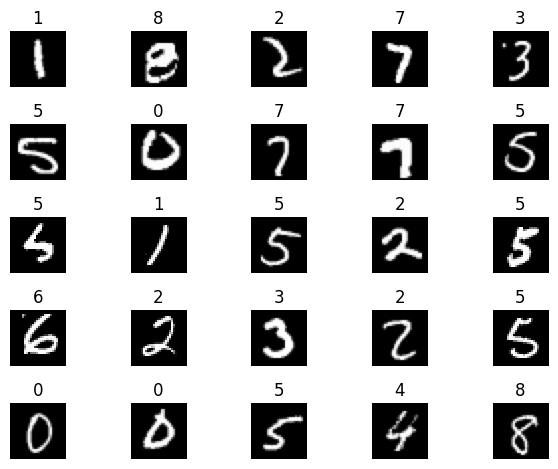

In [63]:
from random import randint
fig, ax = plt.subplots(5, 5)

for i in range(5):
    for j in range(5):
        ind = randint(0, df_test.shape[0])
        ax[i, j].imshow(df_test.iloc[ind, :].values.reshape(28, 28), cmap="gray")
        ax[i,j].set_title(preds[ind])
        ax[i,j].axis("off")
plt.tight_layout()

Creating submission file

In [64]:
#create submission file
df_sub.to_csv('data/submission.csv', index=False)